In [60]:
import pandas as pd
import numpy as np


In [61]:
data = pd.read_csv('happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [62]:
#Checking shape of datset
data.shape

(158, 12)

In [63]:
#Their are no null values in data set
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [65]:
data.describe()
#Overall health of data is looking good,lets do the EDA part for better Understanding of data

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [66]:
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [67]:
#Dropping Country feature as and invaluable contributor
data.drop(['Country'],axis=1,inplace=True)

In [68]:
#Dropping region feature as invaluable contributor
data.drop(['Region'],axis=1,inplace=True)

In [69]:
#Checking the dataset
data

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [70]:
#Splitting variables and outcome

x = data.drop(columns=['Happiness Score'])
y = data['Happiness Score']

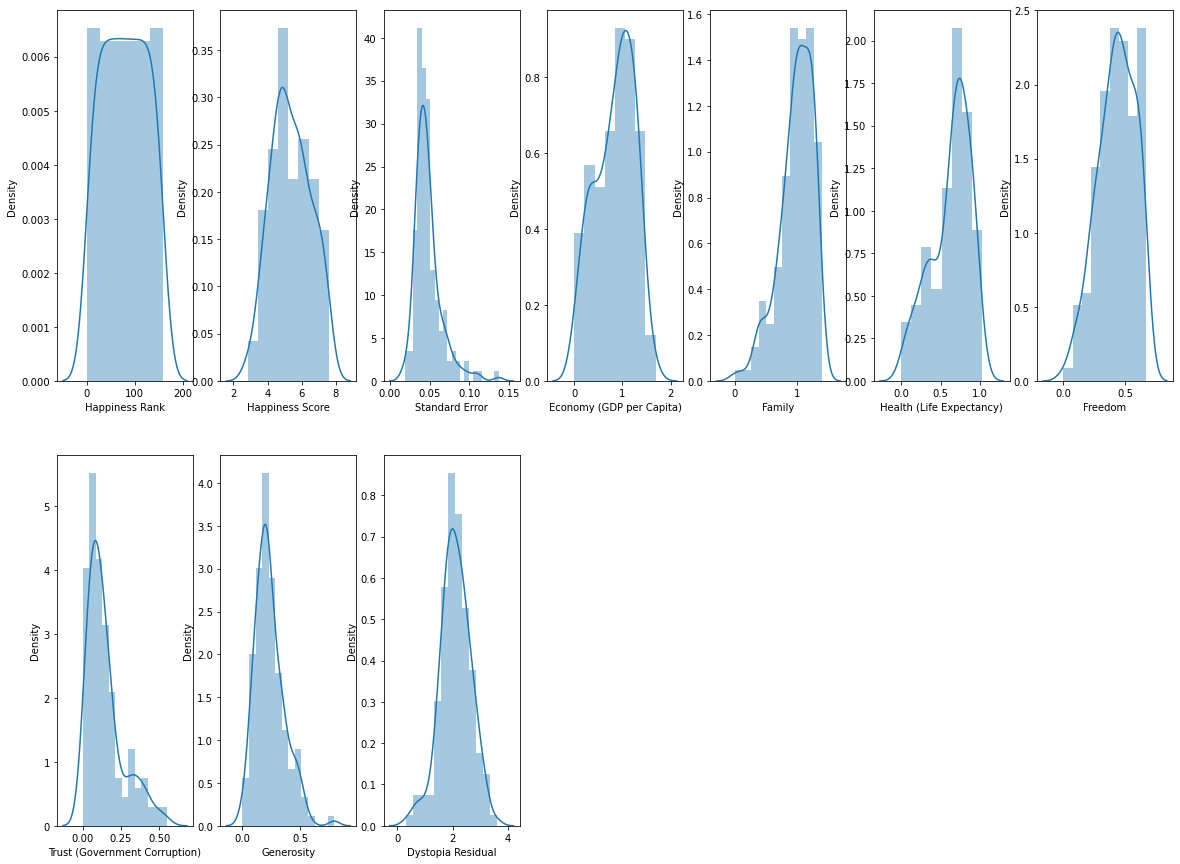

In [71]:
#As data is continuous i am plotting Normal distribution to cross check and doing EDA

plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
    if plotnumber<=14:
        ax= plt.subplot(2,7,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
    
plt.show()    

# Data is behaving normally and forming the normally distributed curve,since we have more features lets chexh if every feature is contributing to outcome Feature VS Label

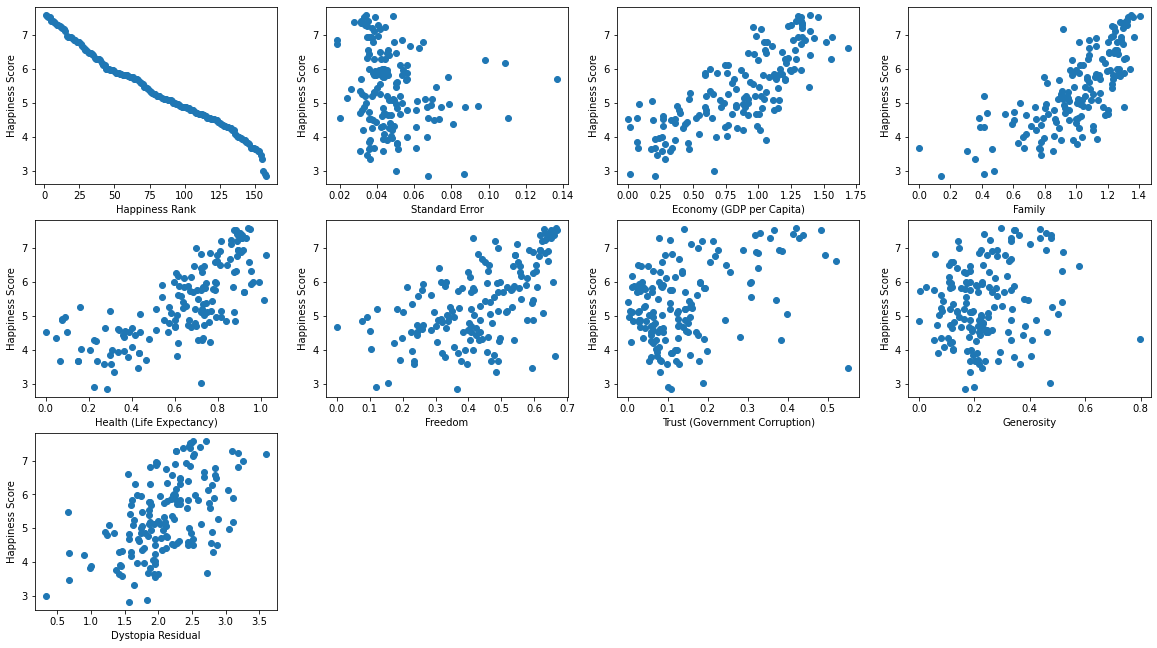

In [72]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in x:
    if plotnumber<14:
        ax= plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Happiness Score')
        
    plotnumber+=1
    
plt.show()    

# It is following the pattern and showing that every feature is contributing

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [74]:
#creating object for standard Scaler
scaler = StandardScaler()

In [75]:
#Keeping scaled values in variables
x_scaled = scaler.fit_transform(x)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

In [78]:
#Creating object for Linear regression
LR = LinearRegression()

In [79]:
#Model training
LR.fit(x_train,y_train)

LinearRegression()

In [80]:
#Training score
LR.score(x_train,y_train)

0.9999999442594641

In [81]:
#Model training on testing data
LR.fit(x_test,y_test)

LinearRegression()

In [82]:
#Testing score
LR.score(x_test,y_test)

0.9999999469615608

In [83]:
from sklearn.metrics import r2_score

In [102]:
#predicting testing data
y_pred = LR.predict(x_test)
y_pred

array([7.37809498, 4.79966641, 5.75451488, 5.98698037, 4.27079185,
       3.78090568, 4.56459151, 5.84762345, 6.79781875, 5.07323734,
       7.52694019, 6.86720887, 7.18715219, 6.90124911, 5.01292968,
       5.26781201, 3.81936659, 5.33245415, 6.12272629, 3.89642788,
       4.69391526, 5.99503464, 7.36357607, 5.09760135, 2.83906518,
       4.88462701, 6.85289047, 5.1922325 , 6.6697768 , 3.65500978,
       6.1679563 , 5.58868695, 6.29813611, 3.95564832, 7.11950074,
       4.78634259, 4.33186263, 5.12318892, 4.4193403 , 4.97111594])

In [104]:
#R2 score on testing data
r2_score(y_test,y_pred)

0.9999999469615608

In [53]:
!pip install xgboost

In [93]:
import xgboost as xgb

In [94]:
#Creating object for xgb and Model training
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [95]:
#Training of testing data
xgb.fit(x_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [100]:
# Prediction
y_pred= xgb.predict(x_test)
y_pred

array([7.378509 , 4.800392 , 5.7548594, 5.987967 , 4.2713795, 3.781932 ,
       4.5633245, 5.8473344, 6.797695 , 5.073599 , 7.525717 , 6.8671513,
       7.186888 , 6.901611 , 5.0128865, 5.268578 , 3.8186655, 5.3325415,
       6.124003 , 3.8963437, 4.6944747, 5.995902 , 7.3639607, 5.097493 ,
       2.8391337, 4.8845735, 6.851827 , 5.1899014, 6.670105 , 3.6554573,
       6.1680746, 5.58846  , 6.298215 , 3.9562016, 7.118999 , 4.785837 ,
       4.331755 , 5.122695 , 4.4190426, 4.9704986], dtype=float32)

In [101]:
#Model confidence with XGB
r2_score(y_test,y_pred)

0.9999996641102954

In [ ]:
###Here Model is complete with Linear Regression and XGB,Both are giving same accuracies######